In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
names = ['sepal-length','sepal-width','petal-length','petal-width','class']

In [3]:
data_set = pd.read_csv('iris.csv',names=names)

In [4]:
data_set.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data_set.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data_set['sepal-length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal-length, dtype: float64

In [7]:
data_set.shape

(150, 5)

In [8]:
data_set.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12B9D0D0>,
      dtype=object)

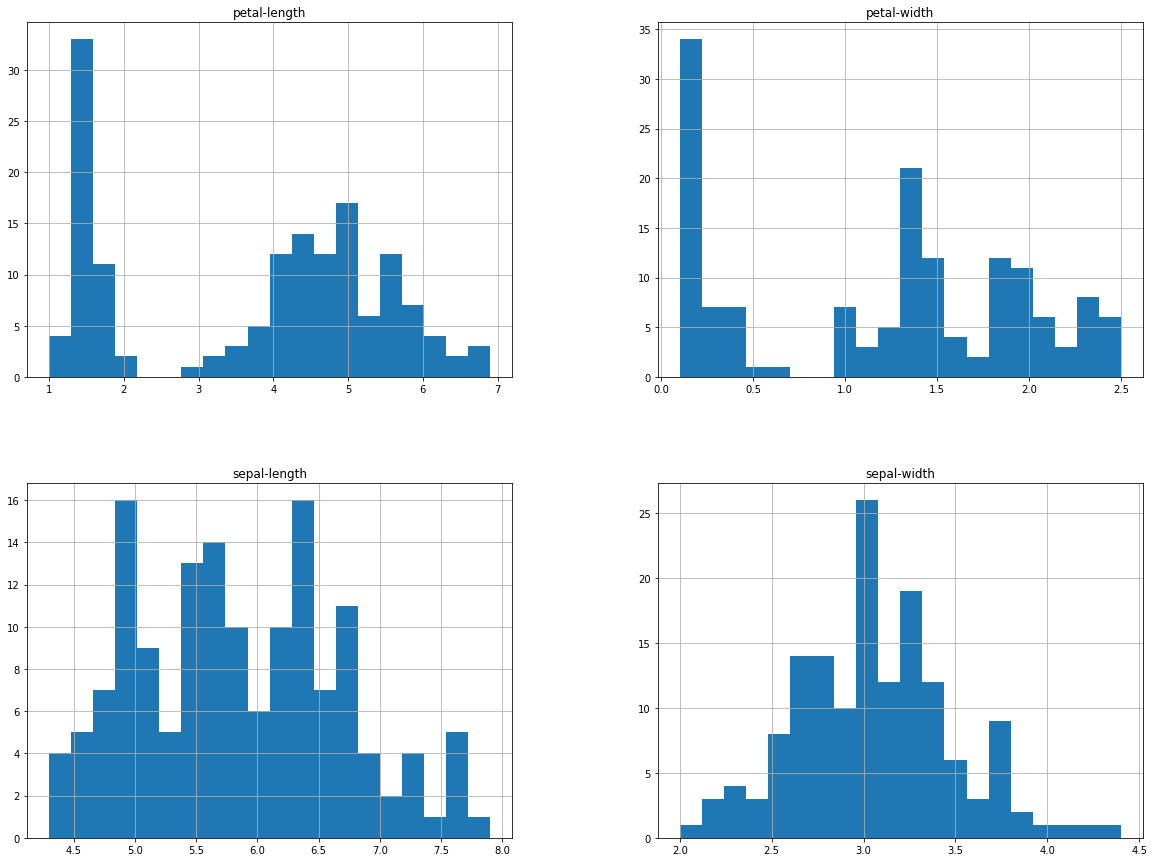

In [9]:
data_set.hist(bins=20,figsize=(20,15))
#figsize inludes width,height and bins include the seperation of data into equal parts b/w minimum and maximum value 


In [10]:
array = data_set.values
X = array[:,0:4]
Y = array[:,4]
#x = all the attributes except class
#y = class attribute because prediction will be made on x  

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size=0.2, random_state=6)
#always remember that random_state is the value after which the data starts to shuffle

# looking correaltions

In [12]:
corr_matrix = data_set.corr()

In [13]:
corr_matrix['sepal-length'].sort_values(ascending=False)

sepal-length    1.000000
petal-length    0.871754
petal-width     0.817954
sepal-width    -0.109369
Name: sepal-length, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13DB7AC0>,
      dtype=object)

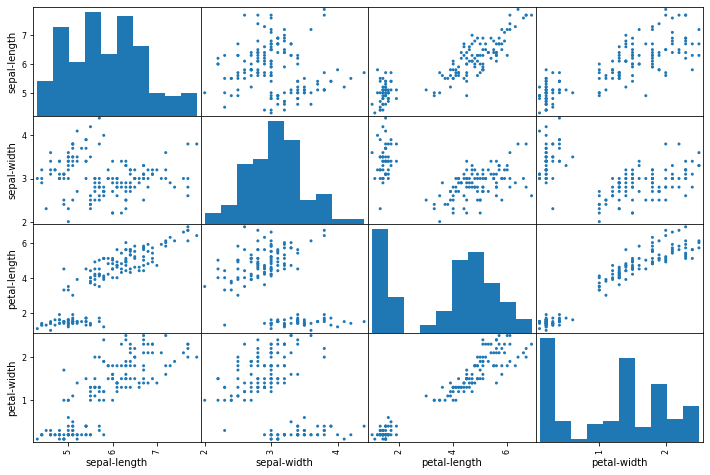

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_set,figsize = (12,8),alpha=1)


# #Now we will try to select a particular model for the training data set

In [15]:
from sklearn import model_selection , preprocessing
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [16]:
models = []
models.append(('logREG',LogisticRegression()))
models.append(('linDis',LinearDiscriminantAnalysis()))
models.append(('KNClass',KNeighborsClassifier()))
models.append(('DeTrClass',DecisionTreeClassifier()))
models.append(('GauNB',GaussianNB()))
models.append(('SVC',SVC()))

X_train = preprocessing.scale(X_train)
#it is necessary to pre-process the data before giving it to models because some model may not work efficiently
#as data provided may have different sd's scatterd over a wide range

results = []
names = []
for name , model in models:
    kfold = model_selection.KFold(n_splits=10 , random_state = 6 , shuffle=True)
    cv_results = model_selection.cross_val_score(model , X_train , Y_train , cv=kfold , scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    result = "%s : %f (%f)" % (name , cv_results.mean(), cv_results.std())
    print(result)

logREG : 0.958333 (0.041667)
linDis : 0.975000 (0.038188)
KNClass : 0.966667 (0.040825)
DeTrClass : 0.941667 (0.053359)
GauNB : 0.966667 (0.040825)
SVC : 0.958333 (0.041667)


As we can see from above results LnearDiscriminantAnalysis provides the most accurate results.
Now , we gonna select it to predict our values

In [17]:
model_selected = LinearDiscriminantAnalysis()
model_selected.fit(X_train , Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

## making predictions

In [18]:
iris_virginica = data_set.loc[data_set ["class"]=="Iris-virginica"]
iris_virginica.mean()

sepal-length    6.588
sepal-width     2.974
petal-length    5.552
petal-width     2.026
dtype: float64

In [19]:
iris_setosa = data_set.loc[data_set ["class"]=="Iris-setosa"]
iris_setosa.mean()

sepal-length    5.006
sepal-width     3.418
petal-length    1.464
petal-width     0.244
dtype: float64

In [20]:
iris_versicolor = data_set.loc[data_set ["class"]=='Iris-versicolor']  
iris_versicolor.mean()

sepal-length    5.936
sepal-width     2.770
petal-length    4.260
petal-width     1.326
dtype: float64

Add features sepal-length , sepal-width , petal-length , petal-width

In [21]:
print(X_train.shape,Y_train.shape)

(120, 4) (120,)


In [22]:
print(X_test.shape,Y_test.shape)

(30, 4) (30,)


In [23]:
features = np.array([[4,4,2,1]])

In [24]:
a = model_selected.predict(X_test)
a

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype='<U15')

In [25]:
c = 0
for i in range(len(a)):
    if a[i]==Y_test[i]:
        c=c+1
print(c)

11


HERE only 11 values provide correct output out of 30 which can be considerd as good because the data set which we are having is quite small.